In [170]:
#ライブラリ、モジュールのインポート
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.font_manager as fm
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import Point
import re
#import xml.etree.ElementTree as ET

In [205]:
import pandas as pd

# # Excelファイルの読み込み
# file_path = '/home/yasumasa-tezuka/intern_data/140007_park_(神奈川県公園データ).xlsx'  
# df = pd.read_excel(file_path)

# # 住所から市区町村名を抽出するカスタマイズされた関数
# def extract_municipality_custom(address):
#     if pd.isna(address) or not isinstance(address, str):
#         return ''
#     # 神奈川県の部分を削除
#     address = address.replace('神奈川県', '')
#     # 特定の市の場合は区までの記述にする
#     for special_city in ['横浜市', '川崎市', '相模原市']:
#         if special_city in address:
#             split_address = address.split('区')
#             if len(split_address) > 1:
#                 return split_address[0] + '区'
#             break
#     # 通常の市区町村名の抽出
#     for keyword in ['市', '町', '村']:
#         if keyword in address:
#             return address.split(keyword)[0] + keyword
#     return address

# # D列の住所を変換してE列に保存
# df['市区町村'] = df['住所'].apply(extract_municipality_custom)

# # 変更をExcelファイルに保存
# output_path = '/home/yasumasa-tezuka/intern_data/140007_park_(神奈川県公園データ)_修正版.xlsx'  
# df.to_excel(output_path, index=False)


In [212]:
#Excelデータのパスを指定
#公園種別、所在地、面積、設備
file_path_1 = '/home/yasumasa-tezuka/intern_data/140007_park_(神奈川県公園データ)_修正版.xlsx'
# #人口密度
file_path_2 = '/home/yasumasa-tezuka/intern_data/jinkotosetai_r5_10.xlsx'
# #行政区域の面積
file_path_3 = '/home/yasumasa-tezuka/intern_data/administrative_area.xlsx'
#フォントのパス
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc' 

In [213]:
# 公園データの読み込み
park_data = pd.read_excel(file_path_1)
#人口密度,人口総数
population_density = pd.read_excel(file_path_2)
#行政区域面積
administrative_area = pd.read_excel(file_path_3)

In [214]:
print(park_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8031 entries, 0 to 8030
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No.             8030 non-null   float64
 1   自治体名            8030 non-null   object 
 2   名称              8030 non-null   object 
 3   住所              8029 non-null   object 
 4   市区町村            8029 non-null   object 
 5   公園面積            8030 non-null   object 
 6   公園種別            8030 non-null   object 
 7   トイレ             8031 non-null   object 
 8   多目的トイレ          8030 non-null   object 
 9   水飲み・手洗い         8030 non-null   object 
 10  スプリング遊具・スイング遊具  8027 non-null   object 
 11  砂場              8027 non-null   object 
 12  複合遊具            8027 non-null   object 
 13  健康器具            8026 non-null   object 
 14  ブランコ            8027 non-null   object 
 15  すべり台            8027 non-null   object 
 16  ジャングルジム         8027 non-null   object 
 17  鉄棒              8027 non-null   o

In [215]:
# 面積列を数値型に変換し、NaNを削除（あるいは別の値で置き換え）
park_data['公園面積'] = pd.to_numeric(park_data['公園面積'], errors='coerce')
park_data.dropna(subset=['公園面積'], inplace=True)  # NaNを含む行を削除

# 公園のカテゴリを定義（例：小規模＜1000平方メートル、中規模＜10000平方メートル、大規模≥10000平方メートル）
def categorize_park(area):
    if area < 1000:
        return '小規模'
    elif area < 10000:
        return '中規模'
    else:
        return '大規模'
    
# 各公園にカテゴリを割り当てる
park_data['カテゴリ'] = park_data['公園面積'].apply(categorize_park)

# カテゴリ別に公園の数を集計
category_counts = park_data['カテゴリ'].value_counts()

# 結果を表示
print(category_counts)

カテゴリ
小規模    3855
中規模    3469
大規模     705
Name: count, dtype: int64


In [216]:
# データの読み込み
park_data = pd.read_excel(file_path_1)

# 数値に変換する列のリスト
numeric_columns = ['トイレ', '多目的トイレ', '水飲み・手洗い', 'スプリング遊具・スイング遊具', '砂場', '複合遊具', '健康器具', 'ブランコ', 'すべり台', 'ジャングルジム', '鉄棒', 'シーソー', 'ターザンロープ', 'ローラースライダー', 'ふわふわドーム', '芝生広場', '水遊び', 'ランニングコース', 'テニスコート', 'バスケットゴール', '野球場', 'フットサル場', 'サッカー場', 'スケートパーク', 'プール', '体育館', '陸上競技場', 'ウサギ・モルモット', 'ハムスター', 'ひよこ', '馬・ポニー', 'カフェ・飲食施設', '売店', '自動販売機', 'バーベキュー場', 'ドッグラン', '喫煙所', 'イベント広場', '避難場所', '無料駐車場', '有料駐車場', '駐輪場']

# 対象の列のみを数値に変換
for column in numeric_columns:
    park_data[column] = pd.to_numeric(park_data[column], errors='coerce')

# 合計の計算（NaN値は無視される）
sums = park_data[numeric_columns].sum()

# 結果の出力
print(sums)


トイレ               1191.0
多目的トイレ             674.0
水飲み・手洗い           5499.0
スプリング遊具・スイング遊具    1120.0
砂場                3362.0
複合遊具              1700.0
健康器具              1002.0
ブランコ              2655.0
すべり台              2768.0
ジャングルジム            395.0
鉄棒                2270.0
シーソー               280.0
ターザンロープ             82.0
ローラースライダー           31.0
ふわふわドーム              9.0
芝生広場               107.0
水遊び                 28.0
ランニングコース            21.0
テニスコート              72.0
バスケットゴール            42.0
野球場                 76.0
フットサル場               4.0
サッカー場               21.0
スケートパーク              6.0
プール                 53.0
体育館                 13.0
陸上競技場               12.0
ウサギ・モルモット            8.0
ハムスター                1.0
ひよこ                  1.0
馬・ポニー                6.0
カフェ・飲食施設            25.0
売店                  32.0
自動販売機              161.0
バーベキュー場             16.0
ドッグラン                8.0
喫煙所                 27.0
イベント広場              31.0
避難場所               341.0
無料駐車場              126.0


In [217]:
# 公園種別のカウント
park_type_counts = park_data['公園種別'].value_counts()
park_location = park_data['市区町村'].value_counts()
print(park_type_counts)
print(park_location)

公園種別
街区公園                        6589
近隣公園                         354
その他                          300
都市緑地                         291
都市林                          137
特殊公園（風致公園、動植物公園、歴史公園、墓園）      76
地区公園（カントリーパーク）                74
緑道                            74
運動公園                          57
総合公園                          46
広域公園                          15
広場公園                          11
緩衝緑地                           2
地区公園                           2
風致公園                           2
Name: count, dtype: int64
市区町村
横須賀市             536
川崎市麻生区           325
藤沢市              317
鎌倉市              287
平塚市              282
大和市              244
相模原市南区           242
厚木市              241
横浜市青葉区           234
横浜市戸塚区           230
相模原市中央区          225
川崎市宮前区           216
秦野市              213
横浜市金沢区           209
横浜市旭区            203
横浜市港南区           184
茅ヶ崎市             183
海老名市             170
横浜市港北区           168
横浜市保土ケ谷区         168
川崎市高津区           164
横浜市神奈川区          156
小田原市   

In [218]:
# フォントプロパティを設定
font_prop = fm.FontProperties(fname=font_path)
# Matplotlibのデフォルトフォントを更新
plt.rcParams['font.family'] = font_prop.get_name()

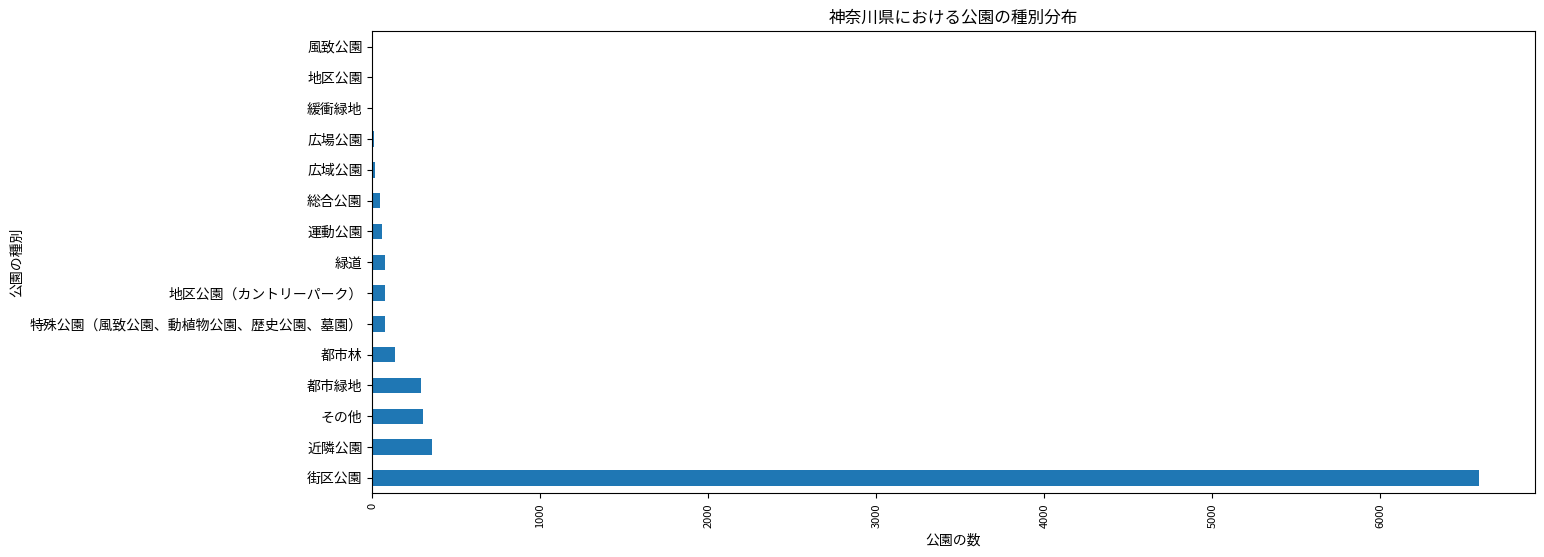

In [219]:
#神奈川県における公園の種別分布
# カテゴリ別に集計
category_counts = park_data['公園種別'].value_counts()

# グラフのサイズを設定
plt.figure(figsize=(15, 6))  # グラフのサイズを15x6インチに設定

# 横棒グラフを描画
category_counts.plot(kind='barh', stacked=True)  # 横棒グラフの描画
plt.title('神奈川県における公園の種別分布')
plt.ylabel('公園の種別')
plt.xlabel('公園の数')
plt.xticks(rotation=90, fontsize=8)
plt.show()


In [220]:
#「令和5年7月1日までの全国都道府県市区町村別の面積値」（国土地理院）https://www.gsi.go.jp/KOKUJYOHO/OLD-MENCHO-title.htmを加工して作成
#Excelファイルを読み込む
# file_path = '/home/yasumasa-tezuka/intern_data/R1_R5_all_mencho.xlsx'  # ここに元のファイルのパスを入力
# df = pd.read_excel(file_path)
# print(df.columns)
# # 特定の行と列を選択（例：1行目から5行目まで、列'A'と'B'）
# selected_data = df.loc[885:960, ['都道府県','市区町村', '令和5年7月1日(k㎡)']]

# # 選択したデータを新しいExcelファイルに保存
# selected_data.to_excel('area.xlsx', index=False)

In [221]:
from geopy.geocoders import Nominatim
from shapely.geometry import Point
import geopandas as gpd

from geopy.exc import GeocoderTimedOut

def get_coordinates(address, attempt=1, max_attempts=3):
    geolocator = Nominatim(user_agent="your_app_name", timeout=10)  # タイムアウトを延長
    try:
        location = geolocator.geocode(address)
        if location:
            return Point(location.longitude, location.latitude)
        else:
            return None
    except GeocoderTimedOut:
        if attempt <= max_attempts:
            return get_coordinates(address, attempt + 1, max_attempts)
        return None

  P13_001 P13_002  P13_003  P13_004 P13_005 P13_006  P13_007  P13_008  \
0    神奈川県    None    三ツ池公園        4    神奈川県     横浜市     1957   296800   
1    神奈川県    None   保土ケ谷公園        5    神奈川県     横浜市     1957   340000   
2    神奈川県    None   四季の森公園        9    神奈川県     横浜市     1988   452800   
3    神奈川県    None  境川遊水池公園        4    神奈川県     横浜市     2007   165182   
4    神奈川県    None  東高根森林公園        9    神奈川県     川崎市     1978   110150   

   P13_009 P13_010                    geometry  
0        2    None  POINT (139.66264 35.52145)  
1        2    None  POINT (139.58380 35.45396)  
2        2    None  POINT (139.53695 35.50580)  
3        2    None  POINT (139.48552 35.38829)  
4        1    None  POINT (139.58626 35.60464)  


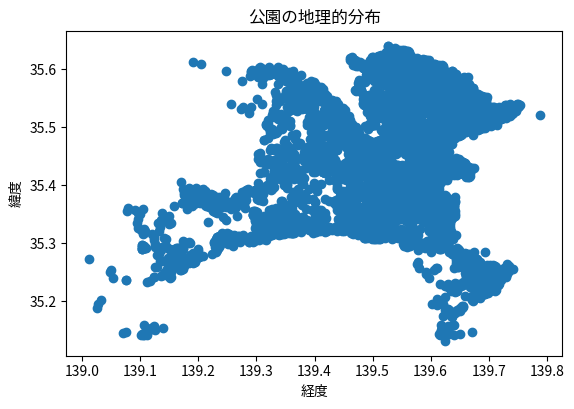

P13_006
横浜市         2372
川崎市          875
横須賀市         359
平塚市          263
藤沢市          256
鎌倉市          233
相模原市         221
秦野市          145
厚木市          132
大和市          126
綾瀬市          116
小田原市         115
海老名市          68
逗子市           62
茅ヶ崎市          60
三浦市           51
中郡大磯町         48
伊勢原市          44
座間市           40
南足柄市          26
愛甲郡愛川町        21
足柄下郡湯河原町      17
中郡二宮町         16
高座郡寒川町        13
足柄下郡箱根町       11
足柄上郡松田町        7
足柄上郡山北町        6
三浦郡葉山町         4
足柄上郡開成町        3
足柄上郡大井町        2
足柄上郡中井町        1
足柄下郡真鶴町        1
Name: count, dtype: int64
Index(['P13_001', 'P13_002', 'P13_003', 'P13_004', 'P13_005', 'P13_006',
       'P13_007', 'P13_008', 'P13_009', 'P13_010', 'geometry'],
      dtype='object')


In [222]:
# シェープファイルの読み込み
gdf = gpd.read_file('/home/yasumasa-tezuka/intern_data/P13-11_14.shp', encoding='shift-jis')

#人口密度,人口総数
population = pd.read_excel(file_path_2)

# データの構造を確認
print(gdf.head())

# データの可視化（地理的な形状のプロット）
gdf.plot()

# 地図の表示設定
plt.title('公園の地理的分布')
plt.xlabel('経度')
plt.ylabel('緯度')
plt.show()

# 市区町村ごとに公園の数をカウント
park_count_by_municipality = gdf['P13_006'].value_counts()
print(park_count_by_municipality)

# 属性データの確認
print(gdf.columns)

In [226]:

# 市区町村名が一致しているか確認
print(set(park_data_copy['市区町村']).difference(set(population['市区町村'])))

# NaN を 0 に置き換える
combined_data['公園面積'].fillna(0, inplace=True)

# 市区町村ごとに公園の総面積を計算
park_area_by_municipality = park_data.groupby('市区町村')['公園面積'].sum()

# 人口データと公園面積データの結合
combined_data = pd.merge(population, park_area_by_municipality, on='市区町村', how='left')

# 人口一人あたりの公園面積を計算
combined_data['park_area_per_capita'] = combined_data['公園面積'] / combined_data['人口総数']

# 結果の表示
print(combined_data[['市区町村', '人口総数', '人口密度', '公園面積', 'park_area_per_capita']])


{'神奈川県愛甲郡愛川町', '神奈川県川崎市', '', '神奈川県三浦郡葉山町', '神奈川県足柄下郡真鶴町', '神奈川県愛甲郡清川村', '神奈川県相模原市', '神奈川県大和市', '神奈川県中郡二宮町', '神奈川県藤沢市', '神奈川県足柄上郡開成町', '神奈川県神奈川県三浦郡葉山町', '神奈川県足柄上郡中井町', '神奈川県足柄上郡山北町', '神奈川県鎌倉市', '神奈川県綾瀬市', '神奈川県三浦市', '神奈川県厚木市', '神奈川県中郡大磯町', '神奈川県座間市', '神奈川県横浜市', '神奈川県茅ヶ崎市', '神奈川県足柄下郡箱根町', '神奈川県伊勢原市', '神奈川県南足柄市', '神奈川県小田原市', '神奈川県平塚市', '相模原市', '神奈川県足柄上郡松田町', '神奈川県三崎町', '神奈川県足柄下郡湯河原町', '神奈川県横須賀市', '神奈川県逗子市', '神奈川県海老名市', '神奈川県秦野市', '神奈川県足柄上郡大井町', '神奈川県高座郡寒川町'}


TypeError: unsupported operand type(s) for +: 'int' and 'str'